In [17]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape


(10000, 28, 28)

In [8]:
len(test_labels)

10000

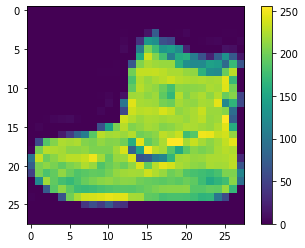

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

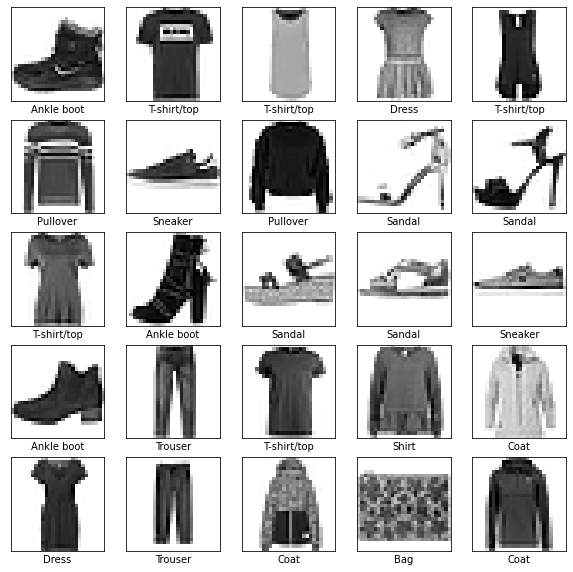

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Build model add nerual network
---

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input is 28 * 28 pixels.
    keras.layers.Dense(256, activation='relu'),  # hidden layer with 128 neruons.
    Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.1),
    keras.layers.Dense(10)  # output match the train_labels with 10 differnt categories.
])

In [61]:
model.compile(optimizer='adam', #adam  rmsprop
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
model.fit(train_images, train_labels, epochs=10)  
# batch_size Number of samples per gradient update. default is 32.
# epochs Number of epochs to train the model. 

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 731us/sample - loss: 0.5031 - acc: 0.8197
Epoch 2/10
60000/60000 [==============================] - 34s 559us/sample - loss: 0.3832 - acc: 0.8595
Epoch 3/10
60000/60000 [==============================] - 32s 540us/sample - loss: 0.3460 - acc: 0.8720 - loss: 0.3
Epoch 4/10
60000/60000 [==============================] - 38s 628us/sample - loss: 0.3287 - acc: 0.8795
Epoch 5/10
60000/60000 [==============================] - 34s 559us/sample - loss: 0.3118 - acc: 0.8847
Epoch 6/10
60000/60000 [==============================] - 30s 498us/sample - loss: 0.2951 - acc: 0.8909
Epoch 7/10
60000/60000 [==============================] - 33s 554us/sample - loss: 0.2846 - acc: 0.8937
Epoch 8/10
60000/60000 [==============================] - 33s 543us/sample - loss: 0.2726 - acc: 0.8968
Epoch 9/10
60000/60000 [==============================] - 34s 569us/sample - loss: 0.2676 - acc: 0.8989
Epoch 10/10
60000/60000 [====

In [63]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 2s - loss: 0.3391 - acc: 0.8824

Test accuracy: 0.8824


In [64]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [48]:
predictions = probability_model.predict(test_images)

In [49]:
predictions[0]

array([4.7895657e-08, 7.6508067e-10, 2.6032805e-09, 4.9126743e-09,
       1.8692201e-09, 1.6243018e-04, 6.2853871e-08, 1.1847346e-02,
       5.9833560e-08, 9.8798716e-01], dtype=float32)

In [50]:
np.argmax(predictions[0])

9

In [51]:
test_labels[0]

9

In [52]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

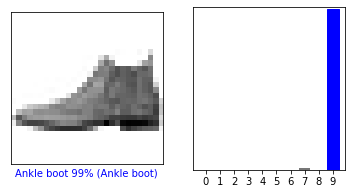

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

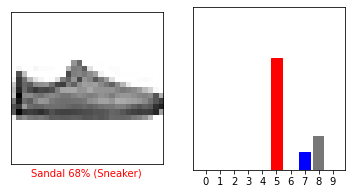

In [54]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

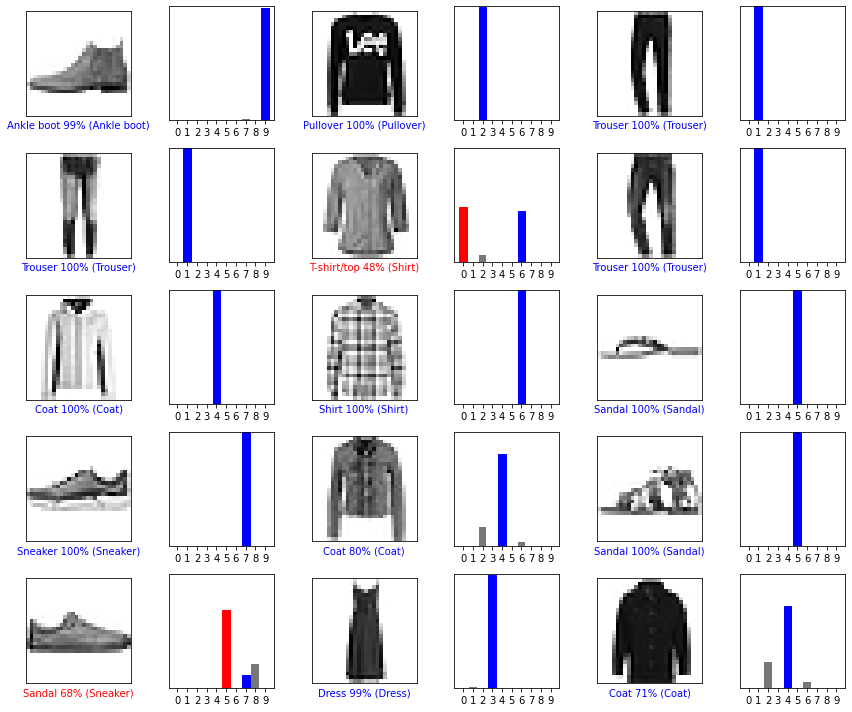

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [56]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [57]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [58]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.3836375e-06 1.9135401e-13 9.9903870e-01 2.3159648e-11 3.5656538e-04
  1.2831165e-19 5.9937401e-04 1.0714802e-24 3.0730564e-11 2.8908827e-21]]


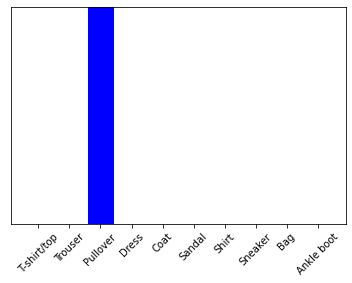

In [59]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
np.argmax(predictions_single[0])

2

Transfer Learning
===

In [ ]:
# MobileNet
# DenseNet
# ImageNet